<a href="https://colab.research.google.com/github/S2DSLondon/S2DS-Summer24-Polyploy/blob/main/notebooks/rfdiffusion_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFdiffusion - ProteinMPNN - OmegaFold pipeline adapted by Micon Garvilles, 2024 July 8th
Note: select T4 GPU from "change runtime".

* The [PolyPloy](https://www.polyploy.tech/) project
    * *Workflow:* RFdiffusion/Evodiffusion (input_file.pdb) → ProteinMPNN (generated_sequence.fa) → omegafold (output_file.pdb)
      
    * *Project aim:* Enzyme with multiple active sites that can degrade plastics

    * *Enzyme detail:* The enzyme Polyester Hydrolase Leipzig 7 (PHL7) in the unliganded state (PDB ID: 7NEI) has its active site characterized by a typical α/β-hydrolase fold. The catalytic triad within this active site includes Ser131, His209, and Asp177, which are essential for its hydrolytic activity on polyester substrates such as PET (polyethylene terephthalate). According to PDB, it has A chain. Enzymes like PHL7 usually have an α/β-hydrolase fold, and their active sites often include residues such as serine, histidine, and aspartic acid.

* Pipeline descriptions:

    * [RFdiffusion](https://www.nature.com/articles/s41586-023-06415-8) is a deep learning-based method to predict and generate 3D proteins structures with desired properties and functions using neural network model. Hence, it can be used to create proteins that do not exist in Nature.

    * [ProteinMPNN](https://www.science.org/doi/10.1126/science.add2187) predicts sequences from a given 3D protein structure generated by RFdiffusion. The amino acid sequence at different positions can be coupled between single or multiple chains. On native protein backbones, ProteinMPNN has a sequence recovery of 52.4%, compared to 32.9% of Rosetta.

    * [OmegaFold](https://www.biorxiv.org/content/10.1101/2022.07.21.500999v1.abstract) is the first computational method to successfully predict high-resolution protein 3D structure from a single primary sequence alone. It is based on a combination of a protein language model (that allows to make predictions from single sequences) and a geometry-inspired transformer model trained on protein structures. OmegaFold massively outperforms RoseTTAFold and Alphafold2 in predicting the 3D structure of native protein consisting of a single sequence (e.g. LDDT score of 0.82 against 0.14 anf 0.34 of RoseTTAFold and Alphafold2 on the CAMEO dataset). It can be adapted to multisequence proteins, in which case it should achieve similar prediction accuracy to AlphaFold2 and RoseTTAFOld. [link to description](https://hpc.nih.gov/apps/OmegaFold.html).

* Enzyme biology:

    * Enzymes speed up chemical reactions. Some enzymes can be extracted from bacteria for biotech applications, such as degrading plastics enzymes.

    * Building enzymes in general can be a complicated process as they are made up of unique amino acid sequences, chains, and residues that interact in a non-local way to create its 3D profile, which is what determines the function of the enzyme. The mechanism of how it folds and interacts with other proteins and substrates may also be influenced by various forces (i.e., hydrogen bonds, ionic bonds, disulfide bonds, Van der Waals bond, etc.).

    * The specific and stable binding between an enzyme's active site and its substrate is crucial for the catalytic reaction. The formation of the active site is influenced by the amino acid side chains within the enzyme, which can be examined in detailed protein databases, such as the
    [PDB website](https://www.rcsb.org/).

    * In this pipeline, the term residue refers to an amino acid sequence of a protein. The residues are fundamental to both the structure and function of proteins. In the backbone, they determine the protein's overall structure and stability, while in the active site, they are essential for the enzyme's specificity and catalytic activity.


## Cloning our Team-Poly-Ploy directory

First clone the git repo, using private ssh keys to access it. The key generation step only needs to be done once (1st and 2nd cell), but will need to copy the keys from google drive and do git clone needs to be done each time. Change to desired branch too.

In [ ]:
# #first command generates key rsa 4096 long. Puts your email at the end of it, save the public key to id_rsa and does all of this with no passphrase being asked
# !ssh-keygen -t rsa -b 4096 -C "enriandri2@gmail.com" -f /root/.ssh/id_rsa -N ""

# #this commands scans GitHub's SSH key and adds it to the known_hosts file, which is used to verify the identity of the remote server. : not sure is necessary
# !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# #print the private key that you need to copy and paste in github (the key is the last line in the output which starts with "ssh-rsa" and ends with your email included)
# !cat /root/.ssh/id_rsa.pub

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:xoO+B3MKST+OqkzdZEyt2Y1462fZZGoh/lPpcnCef3o enriandri2@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|                 |
|      .          |
|     . .         |
|    + =oo        |
|   . X.+S.  .    |
|  . *.*oo+ *     |
| . . =oB. & .    |
|o   . +o.O *   E |
|.o..  .o=.+ .o+  |
+----[SHA256]-----+
# github.com:22 SSH-2.0-babeld-64443082
ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCi0oTPFOed/x95mGVWlTVS8xYiqfVJ8fRS90lm0nNz4cjon/lRCv5zmIITslRJKltnFq7TRkG19yEJ6Sb/1qdYGs7MsjKi9kqOffq1PdRREfgHyDPcOLplsfdJRK9maSFhYagdg+Ddb3A6PrJNFhvsQH3RT6+1VnWQNEJiD/3AZJ19MbUY0U+kjPINYMLl13kqW70LlaPfVSa/3qI/2/rKVxR48gTTwSpGuHMnok/L/6YmGkkrg/pN93aIcXt4+YXb0txY84Q13dQw11ViLheRSFRehzuT5QyKepV82sk4advlN11l0X87HTSWRRVaJ+h+M0O6ST6SHGx+Fs04CdDKNEFb4sAFAOVphYgiIVwCB+Q3GmjpeKe6eZPm+ymVEbsSuFPXDJ

Add the public SSH key to GitHub (one-time setup):



1.   go to your GitHub account settings and navigate to the “SSH and GPG keys” section
2.   Click “New SSH key” and provide a name for your key, e.g. my_colab_key
3.  Copy the key that appears as the last line in the output of the previous cell (starts with "ssh-rsa" and ends with your email) and paste it into the key text box on GitHub
4. Click “Add SSH key” and refresh github

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !mkdir /content/drive/MyDrive/ssh_colab
# !cp /root/.ssh/* /content/drive/MyDrive/ssh_colab
# !ls /content/drive/MyDrive/ssh_colab

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/MyDrive/ssh_colab’: File exists
id_rsa	id_rsa.pub  known_hosts


The first two cells that you have just run must be run only once - the first time you open this notebook. After that, comment them out.

Now from google drive we export the key to connect google colab with github, which will allow to then use all the amenities of the latter (git-clone, git-commit, etc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir /root/.ssh/
!cp /content/drive/MyDrive/ssh_colab/* /root/.ssh/

Mounted at /content/drive


Git clone the repository and switch to your branch

In [ ]:
%cd /content

import os

# Check if the directory already exists
if not os.path.isdir("S2DS-Summer24-Polyploy"):
    # If it does not exist, clone the repository
    !git clone git@github.com:S2DSLondon/S2DS-Summer24-Polyploy.git
    # Change to the repository directory
    # %cd S2DS-Summer24-Polyploy
else:
    print('S2DS-Summer24-Polyploy already existing')

/content
Cloning into 'S2DS-Summer24-Polyploy'...
remote: Enumerating objects: 1779, done.
remote: Counting objects: 100% (581/581), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 1779 (delta 399), reused 528 (delta 370), pack-reused 1198
Receiving objects: 100% (1779/1779), 121.03 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (926/926), done.


In [ ]:
%cd S2DS-Summer24-Polyploy

# Fetch all branches
!git fetch

# Checkout the specific branch
!git checkout Enrico_micon_pipeline_v3

# Update your branch in case you had uploaded anything new
!git pull origin Enrico_micon_pipeline_v3

# List the files to verify you actually managed to go into the branch you want to be
!ls

%cd ..
%pwd


/content/S2DS-Summer24-Polyploy
Branch 'Enrico_micon_pipeline_v3' set up to track remote branch 'Enrico_micon_pipeline_v3' from 'origin'.
Switched to a new branch 'Enrico_micon_pipeline_v3'
From github.com:S2DSLondon/S2DS-Summer24-Polyploy
 * branch            Enrico_micon_pipeline_v3 -> FETCH_HEAD
Already up to date.
5an7-2.pdb			     models
5an7_misplaced.pdb		     notebooks
5an7.pdb			     README.md
complete_work_flow.ipynb	     references
data				     reports
enrico_mcg_pipeline_enzyme_v3.ipynb  requirements.txt
evodiff_installation.txt	     src
mcg_pipeline_enzyme_v3.ipynb	     today_enrico_mcg_pipeline_enzyme_v3.ipynb
/content


'/content'

## Setting-up RFdiffusion, ProteinMPNN and OmegaFold

### a. Check and set working directory

In [ ]:
# Check current dir
import time
import os
import time
from pathlib import Path

print(os.getcwd())

# Save the current directory path to root_dir variable
root_dir = Path('/content')
root_dir

/content


PosixPath('/content')

### b. Install all packages and Clone RFdiffusion

In [ ]:
# Install RFdiffusion without installing pytorch ~3minutes
# Install RFdiffusion adapted from Aleksandra Olszewska
# Install RFdiffusion originally by Sergey Ovchinnikov (https://github.com/sokrypton)

tic = time.time()
os.chdir(root_dir)
os.system("git clone https://github.com/RosettaCommons/RFdiffusion.git")  # Original repo

os.system("pip install jedi omegaconf hydra-core icecream pyrsistent pynvml decorator")
os.system("pip install git+https://github.com/NVIDIA/dllogger#egg=dllogger")
# 17Mar2024: adding --no-dependencies to avoid installing nvidia-cuda-* dependencies
os.system("pip install --no-dependencies dgl==2.0.0 -f https://data.dgl.ai/wheels/cu121/repo.html")
os.system("pip install --no-dependencies e3nn==0.3.3 opt_einsum_fx")
os.system("cd RFdiffusion/env/SE3Transformer; pip install .")
os.environ["DGLBACKEND"] = "pytorch"

os.chdir(root_dir / 'RFdiffusion')
!pip install --no-dependencies -e .

# Get PPI Scaffold Examples for RFdiffusion
os.chdir(root_dir / 'RFdiffusion')
!tar -xvf examples/ppi_scaffolds_subset.tar.gz -C examples/

# Download model weights into 'models' dir inside RFdiffusion
os.chdir(root_dir / 'RFdiffusion')
if not os.path.exists('models'):
  os.mkdir('models')
os.chdir('./models')
!wget http://files.ipd.uw.edu/pub/RFdiffusion/6f5902ac237024bdd0c176cb93063dc4/Base_ckpt.pt
!wget http://files.ipd.uw.edu/pub/RFdiffusion/e29311f6f1bf1af907f9ef9f44b8328b/Complex_base_ckpt.pt
#!wget http://files.ipd.uw.edu/pub/RFdiffusion/60f09a193fb5e5ccdc4980417708dbab/Complex_Fold_base_ckpt.pt
#!wget http://files.ipd.uw.edu/pub/RFdiffusion/74f51cfb8b440f50d70878e05361d8f0/InpaintSeq_ckpt.pt
#!wget http://files.ipd.uw.edu/pub/RFdiffusion/76d00716416567174cdb7ca96e208296/InpaintSeq_Fold_ckpt.pt
!wget http://files.ipd.uw.edu/pub/RFdiffusion/5532d2e1f3a4738decd58b19d633b3c3/ActiveSite_ckpt.pt
#!wget http://files.ipd.uw.edu/pub/RFdiffusion/12fc204edeae5b57713c5ad7dcb97d39/Base_epoch8_ckpt.pt

#!wget http://files.ipd.uw.edu/pub/RFdiffusion/f572d396fae9206628714fb2ce00f72e/Complex_beta_ckpt.pt

# original structure prediction weights
!wget http://files.ipd.uw.edu/pub/RFdiffusion/1befcb9b28e2f778f53d47f18b7597fa/RF_structure_prediction_weights.pt

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

Obtaining file:///content/RFdiffusion
  Preparing metadata (setup.py) ... done
  Running setup.py develop for rfdiffusion
ppi_scaffolds/
ppi_scaffolds/HEEHE_2518_ss.pt
ppi_scaffolds/HHH_b1_00611_ss.pt
ppi_scaffolds/HHH_b1_00312_ss.pt
ppi_scaffolds/01d461f506ab04f7d0ebca3e58138a95_0001_ss.pt
ppi_scaffolds/HHH_b2_00055_adj.pt
ppi_scaffolds/HHH_b1_06097_adj.pt
ppi_scaffolds/HHH_b2_03550_adj.pt
ppi_scaffolds/HHH_b1_01422_ss.pt
ppi_scaffolds/HHH_b2_02422_ss.pt
ppi_scaffolds/HHH_b2_02121_ss.pt
ppi_scaffolds/HHH_b2_04798_adj.pt
ppi_scaffolds/HHH_b1_01645_adj.pt
ppi_scaffolds/915c467777ae14ad0cbad57e3ac0e165_0001_adj.pt
ppi_scaffolds/HHH_b2_07193_adj.pt
ppi_scaffolds/aadf5aa4c991a2bbf69164fcaa2c5d6f_0001_1_ss.pt
ppi_scaffolds/HHH_b1_04925_ss.pt
ppi_scaffolds/HHH_b1_03924_adj.pt
ppi_scaffolds/0cd074c2d6d3de76f1399c5a775575d2_0001_1_adj.pt
ppi_scaffolds/HHH_b1_03663_ss.pt
ppi_scaffolds/HHH_eva_0296_adj.pt
ppi_scaffolds/HHH_b2_03436_ss.pt
ppi_scaffolds/HHH_b2_03817_ss.pt
ppi_scaffolds/HHH_b2_0411

### c. Quick check run RFdiffusion

In [ ]:
# Quick check that RFdiftusion runs - (1 design (~37minutes in CPU & 1.08minutes in GPU))
tic = time.time()
os.chdir(root_dir)

!./RFdiffusion/scripts/run_inference.py \
   'contigmap.contigs=[150-150]' \
   inference.output_prefix=./output/test \
   inference.num_designs=1

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

/content/RFdiffusion/rfdiffusion/util.py:253: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at ../aten/src/ATen/native/Cross.cpp:62.)
  Z = torch.cross(Xn, Yn)
[2024-07-15 09:37:51,243][__main__][INFO] - Found GPU with device_name Tesla T4. Will run RFdiffusion on Tesla T4
Reading models from /content/RFdiffusion/rfdiffusion/inference/../../models
[2024-07-15 09:37:51,244][rfdiffusion.inference.model_runners][INFO] - Reading checkpoint from /content/RFdiffusion/rfdiffusion/inference/../../models/Base_ckpt.pt
This is inf_conf.ckpt_path
/content/RFdiffusion/rfdiffusion/inference/../../models/Base_ckpt.pt
Assembling -model, -diffuser and -preprocess configs from checkpoint
USING MODEL CONFIG: self._conf[model][n_extra_block] = 4
USING MODEL CONFIG: self._conf[model][n_main_b

### d. Clone ProteinMPNN

In [ ]:
# Clone protein MPNN ~0minutes
tic = time.time()

os.chdir(root_dir)
!git clone https://github.com/dauparas/ProteinMPNN.git

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

Cloning into 'ProteinMPNN'...
remote: Enumerating objects: 634, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 634 (delta 173), reused 144 (delta 144), pack-reused 419
Receiving objects: 100% (634/634), 119.88 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (285/285), done.
Updating files: 100% (109/109), done.
It took 0.17 minutes to run this script


### e. Quick check run ProteinMPNN

In [ ]:
# Quick check that protein MPNN runs - 0.12minutes
tic = time.time()

os.chdir(root_dir)
!python ./ProteinMPNN/protein_mpnn_run.py \
  --pdb_path './RFdiffusion/examples/input_pdbs/5an7.pdb' \
  --out_folder './output' \
  --num_seq_per_target 3

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: 5an7
3 sequences of length 247 generated in 2.7224 seconds
It took 0.12 minutes to run this script


### f. Clone OmegaFold

In [ ]:
# Clone OmegaFold ~0.17 minutes
tic = time.time()

os.chdir(root_dir)
!git clone https://github.com/HeliXonProtein/OmegaFold.git
!pip install biopython

os.chdir(root_dir / 'OmegaFold')
!pip install --no-dependencies -e .

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

Cloning into 'OmegaFold'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 208 (delta 50), reused 38 (delta 38), pack-reused 145
Receiving objects: 100% (208/208), 726.66 KiB | 10.84 MiB/s, done.
Resolving deltas: 100% (125/125), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.8 MB/s eta 0:00:00
Obtaining file:///content/OmegaFold
  Preparing metadata (setup.py) ... done
  Running setup.py develop for OmegaFold
It took 0.31 minutes to run this script


### g. Quick check run OmegaFold

In [ ]:
# Quick check that OmegaFold runs - 15.15minutes in GPU
tic = time.time()

os.chdir(root_dir)
!omegafold './output/seqs/5an7.fa' './output'

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

/content/OmegaFold/omegafold/utils/protein_utils/residue_constants.py:482: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at ../aten/src/ATen/native/Cross.cpp:62.)
  eznorm = torch.cross(ex_normalized, ey_normalized)
INFO:root:Downloading weights from https://helixon.s3.amazonaws.com/release1.pt to /root/.cache/omegafold_ckpt/model.pt
100% 2.96G/2.96G [01:10<00:00, 45.3MB/s]
INFO:root:Constructing OmegaFold
INFO:root:Reading ./output/seqs/5an7.fa
INFO:root:Predicting 1th chain in ./output/seqs/5an7.fa
INFO:root:247 residues in this chain.
INFO:root:Finished prediction in 115.52 seconds.
INFO:root:Saving prediction to ./output/5an7, score=1.3084, global_score=1.3084, fixed_chains=[], designed_chains=['A'], model_name=v_48_020, git_hash=8907e6671bfbfc92303b5f79c4b5e6ce47cdef

# Part 1 of 3. RFdiffusion - backbone prediction


#### Check and setup working directory

In [ ]:
import os
from pathlib import Path
print(os.getcwd())

# Create variable that stores root directory
root_dir = Path("/content")
os.chdir(root_dir)
print(root_dir)

# Create output folder if not already exist
if not os.path.exists('output'):
  os.mkdir('output')

/content/OmegaFold
/content


#### Function to run RFdiffusion

In [ ]:
def run_rfdiffusion(RF_input: str, RF_output: str, number_proteins: int,
                    residues: str = None, guide_scale: int = None,
                    substrate_name: str = None, model_weights: str = None,
                    contig_length: str = None, guiding_potentials: str = None):
    """
    If the name of the substrate is specified (e.g. LLK), it must be present in the input pdb file.
    """
    if RF_input is not None and not os.path.exists(RF_input):
      raise ValueError("Input file does not exist")

    # Input checks
    if residues is None and guide_scale is not None:
        raise ValueError("Please fill in residues")

    # Create function call
    sh_call = "./RFdiffusion/scripts/run_inference.py"
    #sh_call = "run_inference.py"
    sh_call += " inference.output_prefix=" + RF_output
    sh_call += " inference.num_designs=" + str(number_proteins)

    # Optional arguments
    if RF_input != "":
        sh_call += " inference.input_pdb=" + RF_input

    if residues is not None:
        # contigmap.contigs line must be in single quotes
        sh_call += " 'contigmap.contigs=" + residues + "'"

    if contig_length is not None:
        sh_call += " contigmap.length=" + contig_length

    if guide_scale is not None:
        sh_call += " potentials.guide_scale=" + str(guide_scale)

    if guiding_potentials is not None:
        # potentials.guiding_potentials line must be in single quotes
        # the guiding_potentials must be in double quotes
        #sh_call += " " + repr('potentials.guiding_potentials=["type:substrate_contacts,s:1,r_0:8,rep_r_0:5.0,rep_s:2,rep_r_min:1"]')
        sh_call += " 'potentials.guiding_potentials=[" + '"' + guiding_potentials + '"' + "]'"

    if substrate_name is not None:
        sh_call += " potentials.substrate=" + substrate_name

    if model_weights is not None:
        sh_call += " inference.ckpt_override_path=" + model_weights

    print("Running RFdiffusion with call", sh_call)

    os.system(sh_call)


### Generate backbones using different parameters below

#### Method 1: motif-scaffolding
* RF_input : path to input pdb file
* RF_output : path to output folder, followed by prefix of output file
* residues : specify active site to keep & add number of random residues before and after and in between active sites.
* number_proteins: number of protein designs to generate

In [ ]:
# Method 1: motif-scaffolding - 1.28 minutes
# The log file for RFdiffusion is saved by default in ./outputs/<date>/<time>
tic = time.time()

os.chdir(root_dir)  # RFdiffusion repo must be in root_Dir
run_rfdiffusion(RF_input="./RFdiffusion/examples/input_pdbs/5an7.pdb",
                RF_output="./output/5an7",
                number_proteins=1,
                residues="[10-100/A1083-1083/10-100/A1051-1051/10-100/A1180-1180/10-100]")

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

#### Method 2: motif scaffolding with target
Based on **RFdiffusion/examples/design_motifscaffolding_with_target.sh**

* RF_input : path to input pdb file
* RF_output : path to output folder, followed by prefix of output file
* residues : specify active site to keep & add number of random residues before and after and in between active sites.
** add a space between residues for a chain break
* number_proteins: number of protein designs to generate
* contig_lengths: constrain total length of diffused chain between the number specified below
* model_weights: design tested in the paper



In [ ]:
# Method 2: motif scaffolding with target - 0.89 minutes
tic = time.time()

os.chdir(root_dir)
run_rfdiffusion(RF_input="./RFdiffusion/examples/input_pdbs/5an7.pdb",
                RF_output="./output/5an7_scaffold",
                residues="[10-100/A1083-1083/10-100/A1051-1051/10-100/A1180-1180/10-100]",
                contig_length="70-100",
                number_proteins=1,
                model_weights="./RFdiffusion/models/Complex_base_ckpt.pt")

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

#### Method 3: enzyme
scaffold an active site from an enzyme, and implicitly model the substrate with an external potential

* RF_input : path to input pdb file
* RF_output : path to output folder, followed by prefix of output file
* residues : specify active site to keep & add number of random residues before and after and in between active sites.
** add a space between residues for a chain break
* number_proteins: number of protein designs to generate
* model_weights: design tested in the paper
* guide_scale: set the scale to 1
* guiding_potential: set the parameters for the guiding potential
* substrate_name: potential contact for substrate or ligand binding to active site of enzyme. This shows up if PDB file of enzyme has a bound ligand.

In [ ]:
# Method 3: enzyme - 2.97 minutes
tic = time.time()

os.chdir(root_dir)
run_rfdiffusion(RF_input="./RFdiffusion/examples/input_pdbs/5an7.pdb",
                RF_output="./output/5an7_enzyme",
                residues="[10-100/A1083-1083/10-100/A1051-1051/10-100/A1180-1180/10-100]",
                number_proteins=1,
                guide_scale=1,
                guiding_potentials="type:substrate_contacts,s:1,r_0:8,rep_r_0:5.0,rep_s:2,rep_r_min:1",
                substrate_name="LLK",
                model_weights="./RFdiffusion/models/ActiveSite_ckpt.pt")

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

***
This is the end of the RF diffusion script. Proceed to ProteinMPNN.
***

# Part 2 of 3. ProteinMPNN - sequence generation



#### Function to run proteinMPNN

In [ ]:
def run_protein_mpnn(pmpnn_input: str, pmpnn_output: str,
                    num_seq_per_target: int = 10, #default
                    sampling_temp: str = "0.1", #default
                    seed: int = 0 , #default
                    batch_size: int = 1, #default
                    model_name: str = "v_48_020"): #default

    # To-do : add check when input file does not exist


    sh_call= "python ./ProteinMPNN/protein_mpnn_run.py"
    sh_call+= " --pdb_path " + pmpnn_input
    sh_call+= " --out_folder " + pmpnn_output
    sh_call+= " --num_seq_per_target " + str(num_seq_per_target)
    # Must be a string, can contain multiple temps, e.g.  "0.1 0.2"
    sh_call+= " --sampling_temp " + '"' + sampling_temp + '"'
    sh_call+= " --seed " + str(seed)
    sh_call+= " --batch_size " + str(batch_size)
    sh_call+= " --model_name " + model_name

    print("Running ProteinMPNN with call", sh_call)

    os.system(sh_call)

### Method 1: ProteinMPNN generate FASTA file

In [ ]:
tic = time.time() #0.10 minutes

os.chdir(root_dir)
run_protein_mpnn(
    pmpnn_input = "./RFdiffusion/examples/input_pdbs/5an7.pdb",
    pmpnn_output = "./output/mpnn_output",
    num_seq_per_target = 1,
    sampling_temp = "0.1",
    seed = 0,
    batch_size = 1,
    model_name = "v_48_020")

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

***
This is the end of the ProteinMPNN script. Proceed to validation via omegafold or google collab [Alphafold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).
***

# Part 3 of 3. OmegaFold - 3D validation


#### Function to run OmegaFold

In [ ]:
def run_omegafold(omegafold_input: str, omegafold_output: str):

    sh_call= "omegafold"
    sh_call+= " " + omegafold_input
    sh_call+= " " + omegafold_output


    print("Running omegafold with call", sh_call)

    os.system(sh_call)

### Method 1: OmegaFold validates designed 3D protein structure

* omegafold_input = path of file.pdb
* omegafold_output = path of file.pdb

In [ ]:
tic = time.time() #0.44 minutes

run_omegafold(
    omegafold_input = "./input_output/omegafold_input/design_motifscaffolding_0_2AS_sample1.fa",
    omegafold_output = "./input_output/omegafold_output/design_motifscaffolding_0_2AS_sample1.fa" )

toc = time.time()
print("It took {:.2f} minutes to run this script".format((toc - tic)/60))

***
This is the end of the OmegaFold script. Proceed to Pymol or software that views protein structure.
***


# Validation-metrics: Setup Adapted by Enrico Andriolo 2024 July 17th





TM-align, a new algorithm to identify the best structural alignment between protein pairs that combines the TM-score rotation matrix and Dynamic Programming (DP) based on [TM score paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1084323/). There are different metrics used in protein design (see below):

    1. LM Score (Likeness Metric Score): it measures how closely a certain protein sequence resembles a set of natural protein sequences. A good LM score signals that most likely the designed sequence is biochemically plausible and likely to fold correctly in vivo.
    2. TM Score (Template Modeling Score): it measures how similar two 3D protein structures are. TM score is more sensitive to the global topology of the proteins, as such can be used to compare also proteins that have a different AA sequence length.
    3. RMSD Score (Root-Mean-Square Deviation): it measures how overlapping two 3D protein structures are; makes more sense to use this score when the proteins have the same length, as this is a score which is more sensitive to the local structure. Use this score when you want to check that geometry of local structures are preserved.

To compare the protein structure RF-diffusion and the output of OmegaFold, we will employ both the RMSD and the TM scores. 
The RMSD Score can assume any positive value and very schematically:

    1. RMSD < 2: good overlapping (e.g. homologous proteins or proteins in different functional states).
    2. 2< RMSD < 4: moderate overlapping (might have some noticeable differences in secondary structure or domain arrangements.)
    3. 4 < RMSD : poor fit.

The TM-score which again is a function of the distance between the carbon atoms but this time is normalized to 1:

    1. TM close to 1:  high degree of structural similarity
    2. TM>0.7  significant structural similarity.
    3. TM around 0.5 moderate similarity
    4. TM < 0.2 no similarity

The TM score between two proteins actually consists of two numbers (the normalization of the score can be performed either by the number of carbon atoms of one protein or the other).



In [ ]:
# Step 1: Install necessary tools
!pip install biopython
!apt-get update
!apt-get install -y build-essential

# Step 2: Download the TM-align source code
!wget https://zhanglab.ccmb.med.umich.edu/TM-align/TMalign.cpp -O TMalign.cpp

# Step 3: Compile the source code
!g++ -O3 -ffast-math -lm -o TMalign TMalign.cpp

# Verify the installation
!./TMalign -h

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,050 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,192 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,682 kB]
Get:14 

## Define the extract_scores function

This returns these three metrics: (TM-score normalized by ref protein's length,TM-score normalized by generated protein's length, RMSD).
These are the numeric scores that can be used to validate our pipeline, i.e. to quantitatively compare the pdb file generated by RF-diffusion and the pdb file generated by omegafold. In some examples we tested, it turns out that these two pdb files had different length, so maybe TM scores would be a better metric to perform this validation test.

In [ ]:
import re
import os
import subprocess
import glob


def extract_scores(ref_protein, generated_protein): #it takes as inputs the path of the two pdb files
    ref_protein_abs = os.path.abspath(ref_protein)
    generated_protein_abs = os.path.abspath(generated_protein)

    # Run the TMalign command
    tmalign_command = ["./TMalign", ref_protein_abs, generated_protein_abs]
    result = subprocess.run(tmalign_command, capture_output=True, text=True)

    if result.returncode == 0:
        output = result.stdout

        # Extract TM-scores from the output using regex
        tm_scores = re.findall(r"TM-score=\s+([\d.]+)", output)
        if len(tm_scores) >= 2:
            tm_score_1 = float(tm_scores[0])
            tm_score_2 = float(tm_scores[1])
        else:
            print("TM-scores not found in the output.")
            return None

        # Extract RMSD score from the output using regex
        rmsd_score_match = re.findall(r"RMSD=\s+([\d.]+)", output)
        if rmsd_score_match:
            rmsd_score = float(rmsd_score_match[0])
        else:
            print("RMSD score not found in the output.")
            return None

        return tm_score_1, tm_score_2, rmsd_score
    else:
        print(f"Error running TMalign for {generated_protein}. Return code: {result.returncode}")
        print(result.stderr)
        return None

# Optional validation below: if the TM-align score is 1 and RSMD 0 for the same file.
# extract_scores("./output/5an7.pdb", "./output/5an7.pdb")

(1.0, 1.0, 0.0)

## Define the a function for visual comparison of two pdb files.
This function can be used to compare the output of omegafold with the native protein one, to check that the multiples sites have been preserved.

In [ ]:
def visual_comparison(ref_protein, generated_protein): #it takes as inputs the path of the two pdb files
    ref_protein_abs = os.path.abspath(ref_protein)
    generated_protein_abs = os.path.abspath(generated_protein)

    # Run the TMalign command
    tmalign_command = ["./TMalign", ref_protein_abs, generated_protein_abs]
    result = subprocess.run(tmalign_command, capture_output=True, text=True)

    if result.returncode == 0:
      output = result.stdout
      print(output)
    else:
      print(f"Error running TMalign for {generated_protein}. Return code: {result.returncode}")
      print(result.stderr)

visual_comparison("./output/5an7.pdb", "./output/5an7.pdb")


 *********************************************************************
 * TM-align (Version 20220412): protein structure alignment          *
 * References: Y Zhang, J Skolnick. Nucl Acids Res 33, 2302-9 (2005) *
 * Please email comments and suggestions to zhanglab@zhanggroup.org   *
 *********************************************************************

Name of Chain_1: /content/S2DS-Summer24-Polyploy/5an7.pdb (to be superimposed onto Chain_2)
Name of Chain_2: /content/S2DS-Summer24-Polyploy/5an7_misplaced.pdb
Length of Chain_1: 241 residues
Length of Chain_2: 241 residues

Aligned length= 241, RMSD=   0.00, Seq_ID=n_identical/n_aligned= 1.000
TM-score= 1.00000 (if normalized by length of Chain_1, i.e., LN=241, d0=5.75)
TM-score= 1.00000 (if normalized by length of Chain_2, i.e., LN=241, d0=5.75)
(You should use TM-score normalized by length of the reference structure)

(":" denotes residue pairs of d <  5.0 Angstrom, "." denotes other aligned residues)
PRYLKGWLEDVVQLSLRRPSVHASRQRPII

# Work-flow: Setup

#### 1. Create folder structure that will be used by the pipeline.

In [ ]:
import os

# Define the base folder
base_folder = '/content/work_flow'

# Define the subfolders
subfolders = ['RFdiffusion_output', 'mpnn_output', 'omegafold_output', 'native_proteins']

# Check if the base folder already exists
if not os.path.exists(base_folder):
    # Create the base folder
    os.makedirs(base_folder, exist_ok=True)

    # Create the subfolders
    for subfolder in subfolders:
        os.makedirs(os.path.join(base_folder, subfolder), exist_ok=True)

    print("Folder structure created successfully.")
else:
    print("The folder 'work_flow' already exists.")


The folder 'work_flow' already exists.


#### 2. Function to automatically download the pdb file of a native protein inside the native_protein subfolder of work_flow.

In [ ]:
import os
import requests

def download_pdb(pdb_code, target_directory='./work_flow/native_proteins'):
    # Ensure the target directory exists
    os.makedirs(target_directory, exist_ok=True)

    # Construct the full path for the PDB file
    pdb_file_path = os.path.join(target_directory, f"{pdb_code.upper()}.pdb")

    # URL for downloading the PDB file
    url = f"https://files.rcsb.org/download/{pdb_code.upper()}.pdb"

    # Request the PDB file
    response = requests.get(url)

    if response.status_code == 200:
        # Write the content to the PDB file
        with open(pdb_file_path, 'wb') as f:
            f.write(response.content)
        print(f"PDB file {pdb_code.upper()} downloaded successfully to {pdb_file_path}")
    else:
        print(f"Failed to download PDB file {pdb_code.upper()}. Status code: {response.status_code}")


#### 3. Combine all three Steps of our pipeline into one single function.
**The input of this function are:**

       a. the pdb code of the native protein to use.
       b. the variables to run RF diffusion which specify which parts of the native protein to keep.


* When you run this function as output you will get the metrics between the output of step 1 (native_protein) and step 3 (process_protein). Along the way, it will save the output of each step (RFdiffusion, ProteinMPNN and OmegaFold) inside the corresponding *work_flow sub-folder*.

* This function will need to be generalized to take into consideration all possible variables that not only RF diffusion, but also ProteinMNP and Omegafold can accept as input. Out of these, an important is num_cycles variable of Omegafold (currently is running via  --num_cycle 1): the higher it is the longer it takes to run but the better accuracy it gives - sufficiently good results usually achieved with num_cycle > 8.

**A few practical things to keep in mind when using RF diffusion:**
        
        
    a. if I specify the residue to keep via for example "[20-30/A1087-1090/20-30]" then I am keeping the residues numbered from A1087 to A1089 (A1090 is excluded).

    b. Keep at least 20/30 residues at each end as this is the number of residues that are not usually seen via diffraction in the lab at each end (so I guess RF diffusion, proteinMNPP and omgafold shouldnt be able to really do a good job at modelling the beginning and at the end of the protein, as they are trained on samples that do not have this kind of information)


In [ ]:
#we will need this function to isolate the correct pdb file from the files that omegafold will give as output

def find_score_file(pdb_code):
    directory = f'./work_flow/omegafold_output/{pdb_code}'
    score_file_prefix = f'{pdb_code}_score'

    for filename in os.listdir(directory):
        if filename.startswith(score_file_prefix):
            return os.path.join(directory, filename)

    return None

In [ ]:
def process_protein(pdb_code, residues_input):

    download_pdb(pdb_code)
    # Ensure the pdb_code is in uppercase
    pdb_code_upper = pdb_code.upper()

    # Construct the input and output paths
    RF_input = f"./work_flow/native_proteins/{pdb_code_upper}.pdb"
    RF_output = f"./work_flow/RFdiffusion_output/{pdb_code}/{pdb_code}_scaffold"

    # Check if the input file exists
    if not os.path.exists(RF_input):
        raise ValueError(f"Input file {RF_input} does not exist")

    # Run RFdiffusion
    run_rfdiffusion(
        RF_input=RF_input,
        RF_output=RF_output,
        number_proteins=1,
        residues=residues_input
    )

    # Run ProteinMPNN
    run_protein_mpnn(
        pmpnn_input=f"./work_flow/RFdiffusion_output/{pdb_code}/{pdb_code}_scaffold_0.pdb",
        pmpnn_output=f"./work_flow/mpnn_output/{pdb_code}",
        num_seq_per_target=1,
        sampling_temp="0.1",
        seed=0,
        batch_size=1,
        model_name="v_48_020"
    )

    # Run OmegaFold
    run_omegafold(
        omegafold_input=f"./work_flow/mpnn_output/{pdb_code}/seqs/{pdb_code}_scaffold_0.fa",
        omegafold_output=f"./work_flow/omegafold_output/{pdb_code}"
    )

    #now we change the names in the omegafold folder such that in the name there is information about the score:
    #we perform this task in 4 steps
    # 1. Define the folder containing the .pdb files
    folder_path = f'/content/work_flow/omegafold_output/{pdb_code}'

    # 2. List all files in the folder
    files = os.listdir(folder_path)

    # 3. Define a regular expression to extract the relevant parts of the filename
    pattern = re.compile(r"([a-zA-Z0-9]+)_.*score=([\d.]+)")

    # 4. Process each file
    for filename in files:
       if filename.endswith('.pdb'):
           match = pattern.search(filename)
           if match:
                alphanumeric_part = match.group(1)
                score_part = match.group(2)
                new_filename = f"{alphanumeric_part}_score_{score_part}.pdb"
                old_file = os.path.join(folder_path, filename)
                new_file = os.path.join(folder_path, new_filename)
                os.rename(old_file, new_file)
                print(f"Renamed '{filename}' to '{new_filename}'")


    #now let's print the metrics between the output of the first and third steps of the pipeline
    output_first_step=f'./work_flow/RFdiffusion_output/{pdb_code}/{pdb_code}_scaffold_0.pdb'
    output_third_step=find_score_file(pdb_code)

    return extract_scores(output_first_step, output_third_step)

# Example usage
result=process_protein('5an7', "[10-20/A1087-1087/10-20]")
print(result)

PDB file 5AN7 downloaded successfully to ./work_flow/native_proteins/5AN7.pdb
Running RFdiffusion with call ./RFdiffusion/scripts/run_inference.py inference.output_prefix=./work_flow/RFdiffusion_output/5an7/5an7_scaffold inference.num_designs=1 inference.input_pdb=./work_flow/native_proteins/5AN7.pdb 'contigmap.contigs=[10-20/A1087-1087/10-20]'
Running ProteinMPNN with call python ./ProteinMPNN/protein_mpnn_run.py --pdb_path ./work_flow/RFdiffusion_output/5an7/5an7_scaffold_0.pdb --out_folder ./work_flow/mpnn_output/5an7 --num_seq_per_target 1 --sampling_temp "0.1" --seed 0 --batch_size 1 --model_name v_48_020
Running omegafold with call omegafold ./work_flow/mpnn_output/5an7/seqs/5an7_scaffold_0.fa ./work_flow/omegafold_output/5an7
Renamed '5an7_scaffold_0, score=2.9696, global_score=2.9696, fixed_chains=[], designed_chains=['A'], model_name=v_48_020, git_hash=8907e6671bfbfc92303b5f79c4b5e6ce47cdef57, seed=632.pdb' to '5an7_score_2.9696.pdb'
Renamed 'T=0.1, sample=1, score=1.3359, glo

#### 4. Save the results of the pipeline within google drive. It is also possible to push this to github.

In [ ]:
#what happens if i write the pipeline twice ? Check this

from google.colab import drive
import shutil
from distutils.dir_util import copy_tree

# Define source and destination paths
source_folder = './work_flow'
destination_folder = './drive/MyDrive/Colab_Notebooks/work_flow'

# Ensure the destination directory exists
os.makedirs(destination_folder, exist_ok=True)

# Copy the folder contents
copy_tree(source_folder, destination_folder)

['./drive/MyDrive/Colab_Notebooks/work_flow/native_proteins/5AN7.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/omegafold_output/5an7/global_score_1.3359.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/omegafold_output/5an7/5an7_score_2.9696.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/RFdiffusion_output/5an7/5an7_scaffold_0.trb',
 './drive/MyDrive/Colab_Notebooks/work_flow/RFdiffusion_output/5an7/5an7_scaffold_0.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/RFdiffusion_output/5an7/traj/5an7_scaffold_0_Xt-1_traj.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/RFdiffusion_output/5an7/traj/5an7_scaffold_0_pX0_traj.pdb',
 './drive/MyDrive/Colab_Notebooks/work_flow/mpnn_output/5an7/seqs/5an7_scaffold_0.fa']

#### 5. Visually compare the native protein with the generated processed protein.

In [ ]:
pdb_code_native='5an7'
pdb_native=f"./work_flow/native_proteins/{pdb_code_native.upper()}.pdb"
pdb_artificial=find_score_file(pdb_code_native)

visual_comparison(pdb_native,pdb_artificial)


 *********************************************************************
 * TM-align (Version 20220412): protein structure alignment          *
 * References: Y Zhang, J Skolnick. Nucl Acids Res 33, 2302-9 (2005) *
 * Please email comments and suggestions to zhanglab@zhanggroup.org   *
 *********************************************************************

Name of Chain_1: /content/work_flow/native_proteins/5AN7.pdb (to be superimposed onto Chain_2)
Name of Chain_2: /content/work_flow/omegafold_output/5an7/5an7_score_2.9696.pdb
Length of Chain_1: 241 residues
Length of Chain_2: 30 residues

Aligned length= 22, RMSD=   2.99, Seq_ID=n_identical/n_aligned= 0.000
TM-score= 0.07564 (if normalized by length of Chain_1, i.e., LN=241, d0=5.75)
TM-score= 0.26976 (if normalized by length of Chain_2, i.e., LN=30, d0=1.26)
(You should use TM-score normalized by length of the reference structure)

(":" denotes residue pairs of d <  5.0 Angstrom, "." denotes other aligned residues)
PRYLKGWLEDVVQLSLRR

#### 6. To check existence of two sites (i.e. if the protein generated two residues as specified by the user), split the two pdb file generated by omegafold and run separately:

    visual_comparison(pdb_native,pdb_generated_first_half)

    visual_comparison(pdb_native,pdb_generated_second_half)

And to do a proper check of the 3D structures of the two active sites one should include in these two visual comparisons only the smallest part possible related to the active site (both for the native protein and for both the active sites of the artificial enzyme).

So the way to implement this idea would be:
1. use the pipeline with input such that you place the two active sites in a more or less symmetric way along the chain. For example, if you call the pipeline with these residues as input
residues="[20-30/A1087-1091/11-30/A1087-1091/20-30]" you are sure that at worst at one end of the chain you have 20 residues and at the other end you could have 30; this makes a difference of max 30-20=10 residues between the two ends so if you attach the two active sites by a string in the middle of at least 11 residues you are sure that if you split the pdb file into 2 halves then the first half will contain the first active site and the second half will contain the second active site

2. Then
run visual_comparison(pdb_native,pdb_generated_first_half)
visual_comparison(pdb_native,pdb_generated_second_half)
to visually inspect indeed the qualitatively alignment between the active site of the native protein with each of the newly generated active sites.
Check by eyes which are the parts in which there is the alignement and create (for each of pdb_native, pdb_generated_first_half and pdb_generated_second_half) a pdb file with only the residues that have aligned and matched. Let's call these files as:
pdb_native_minimal
pdb_generated_first_half_minimal
pdb_generated_second_half_minimal


3. compute the quantitative score 

extract_scores(pdb_native_minimal,pdb_generated_first_half_minimal)

extract_scores(pdb_native_minimal,pdb_generated_second_half_minimal)

# About pdb files

* In the following chapter we run our pipeline with the protein [7SH6](https://www.rcsb.org/sequence/7SH6).
* This native protein has active sites that consists of the residues located in auth:position 160, 206 and 237. Hover the cursor on top of the three dots highlighted in pink in the "ACTIVE SITE" on left description. The first pink dot on right top will appear as "Position 154 [auth: 160]", as shown by the screenshot below.

* At this point, you may be wondering whether it is "position 154" or "auth: 160" that specifies the location of the desired residue in the pdb file that you can download from that website. 
"Position: 154" simply means the 154th amino acid in the sequence as it appears in the PDB file while "auth:160" refers to the author-provided residue number. The latter is the residue number as it appears in the biological sequence or as reported by the authors in the publication associated with the PDB entry.

* To persuade yourself that indeed is the "auth: number" the number that specifies the pdb entry, have a look at the 7SH6.pdb file. Notice that the first recorded residue is the residue number 29, meaning the diffraction experiment that was used to determine the structure of this protein did not succeed in determining the 3D structure of the first 28 residues. Now go to the same link above and you can now put your cursor on top of the "UNMODELED" part to see that indeed the unmodeled part finishes at auth position 29.

* In Pymol, add 7SH6.pdb file to inspect the amino acid positions. Open pymol > Display > Sequence. This will display the position and sequences of the amino acid corresponding to their position. On top left, you wil notice that the start of the amino acid begins at position 29, which was observed as auth:29 in PDB. In this case, it is best to trust that the position of the site you are trying to modify when you hover the cursor is indicated by auth:number (ie auth:160).



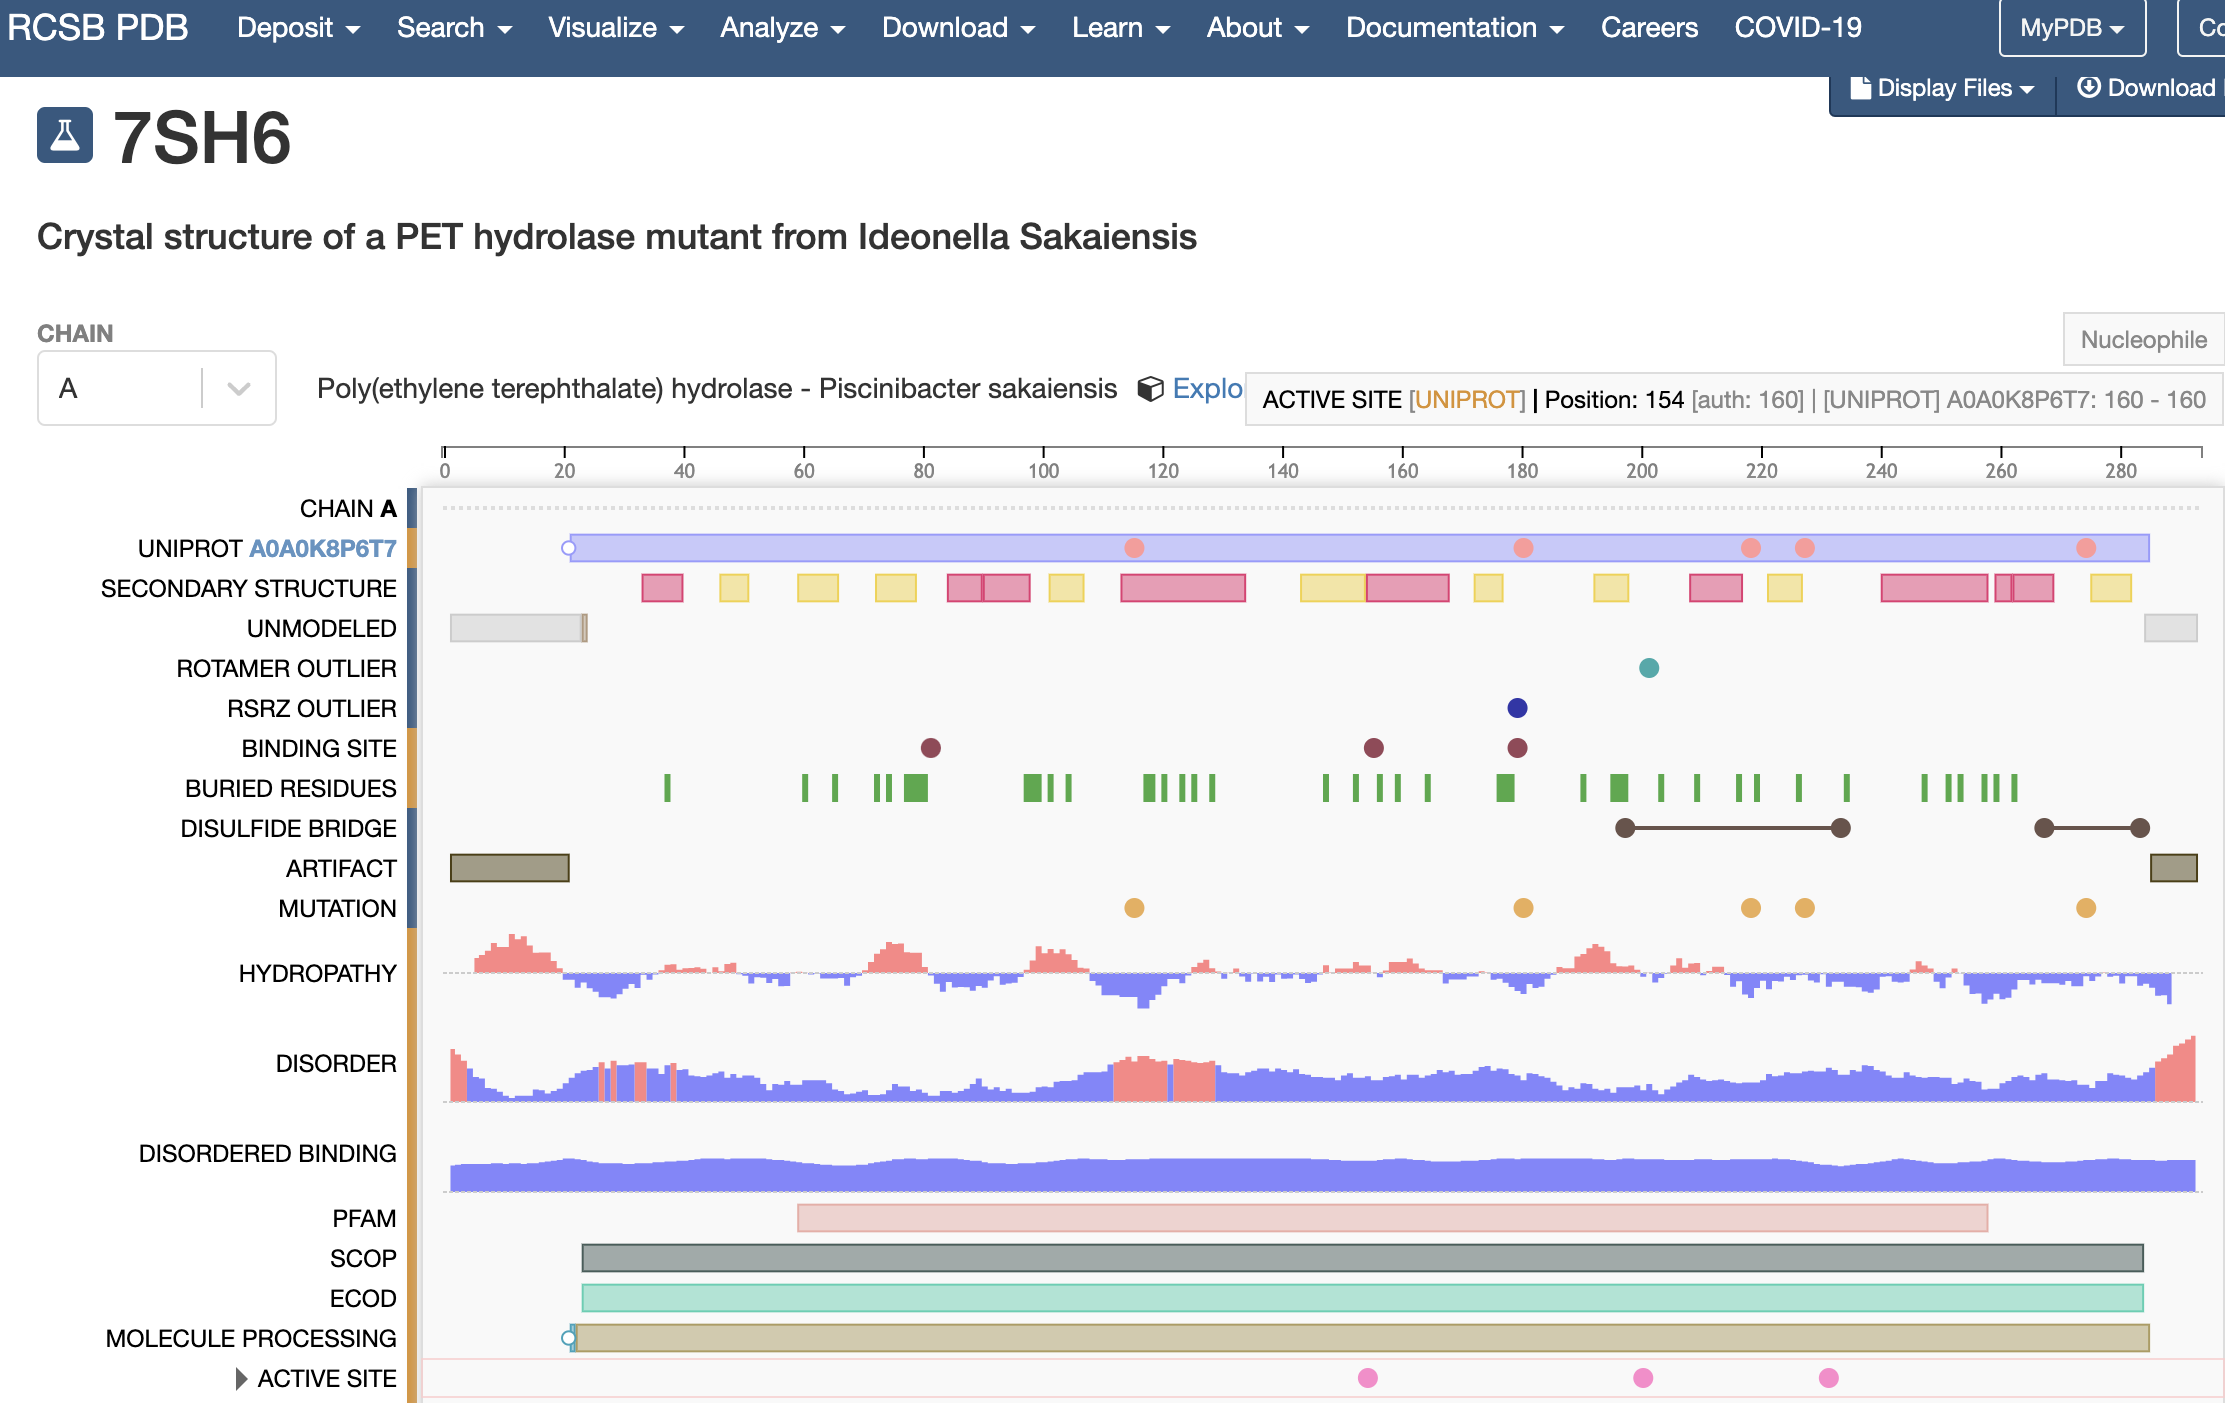


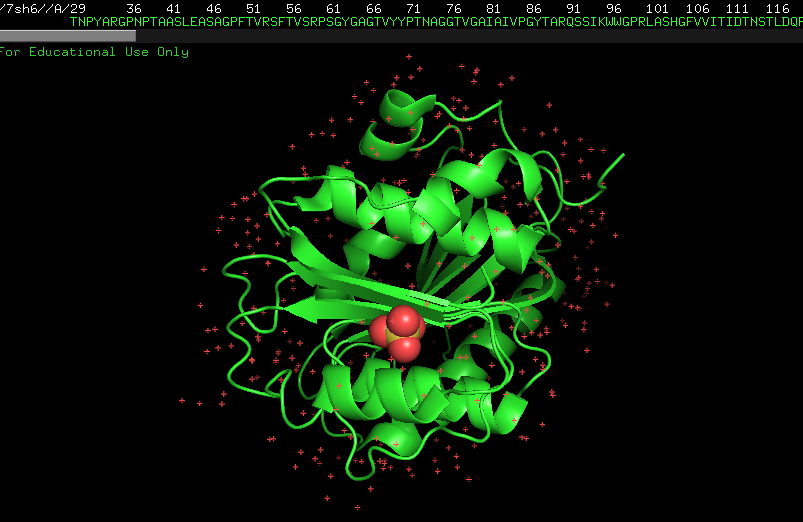

# Complete Work-flow

Here run our pipeline with the protein [7SH6](https://www.rcsb.org/sequence/7SH6).
This protein has an active sites that consists of the residues located in auth:position 160, 206 and 237. 
To save computational time, we will not duplicate the whole region of the active site but only the region that is included around the residue auth:position 160. 


In [ ]:
result=process_protein('7SH6', "[20-30/157-163/20-40/157-163/20-30]")
print(result)

PDB file 7SH6 downloaded successfully to ./work_flow/native_proteins/7SH6.pdb
Running RFdiffusion with call ./RFdiffusion/scripts/run_inference.py inference.output_prefix=./work_flow/RFdiffusion_output/7SH6/7SH6_scaffold inference.num_designs=1 inference.input_pdb=./work_flow/native_proteins/7SH6.pdb 'contigmap.contigs=[20-30/157-163/20-40/157-163/20-30]'


In [ ]:
#what happens if i write the pipeline twice ? Check this

from google.colab import drive
import shutil
from distutils.dir_util import copy_tree

# Define source and destination paths
source_folder = './work_flow'
destination_folder = './drive/MyDrive/Colab_Notebooks/work_flow'

# Ensure the destination directory exists
os.makedirs(destination_folder, exist_ok=True)

# Copy the folder contents
copy_tree(source_folder, destination_folder)

In [ ]:
pdb_code_native='7SH6'
pdb_native=f"./work_flow/native_proteins/{pdb_code_native.upper()}.pdb"
pdb_artificial=find_score_file(pdb_code_native)

visual_comparison(pdb_native,pdb_artificial)

To see how to confirm the presence of two desired sites without using Pymol or any other software that views proteins, see the end of the last chapter of this notebook (Work-flow: Setup).